In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
cancer_data =pd.read_csv('/content/data.csv')

In [3]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer_data =cancer_data.drop(columns=['Unnamed: 32','id'],axis=1)

In [5]:
cancer_data.shape

(569, 31)

In [6]:
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
cancer_data.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


In [9]:
cancer_data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [10]:
cancer_data.replace({'diagnosis':{'M':0,'B':1}},inplace=True)

In [11]:
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
x = cancer_data.drop(columns='diagnosis',axis=1)
y =cancer_data.diagnosis

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [14]:
print(x.shape, x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


#standerizing the data

In [15]:
from sklearn.preprocessing import StandardScaler


In [16]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std =scaler.transform(x_test)

In [17]:
x_train_std

array([[ 1.94029252,  0.85536022,  1.81300604, ...,  1.30477202,
        -0.10637168, -0.43949769],
       [-0.54671184, -1.21003611, -0.59777015, ..., -1.44505823,
        -0.95211319, -1.26923392],
       [-0.73503734, -0.20269437, -0.75741621, ..., -0.73762301,
        -0.23746961, -1.01847415],
       ...,
       [-0.57994575, -0.09896353, -0.62149589, ..., -0.9563972 ,
        -0.01364388, -0.12911281],
       [ 0.54723774,  0.31134958,  0.64280442, ...,  1.40126787,
         1.30692792,  1.73041024],
       [ 0.53062078,  0.07392121,  0.48195196, ...,  0.56748339,
        -0.38135758, -1.07419854]])

#building the nueral network

In [18]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [19]:
# setting up the layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
     ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
#compiling the nueral network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


In [21]:
#training the neural network
history = model.fit(x_train_std,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5700 - loss: 0.9163 - val_accuracy: 0.7174 - val_loss: 0.6500
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7176 - loss: 0.6419 - val_accuracy: 0.7609 - val_loss: 0.4535
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8217 - loss: 0.4721 - val_accuracy: 0.8696 - val_loss: 0.3375
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8834 - loss: 0.3686 - val_accuracy: 0.9130 - val_loss: 0.2668
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9141 - loss: 0.3018 - val_accuracy: 0.9348 - val_loss: 0.2214
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9305 - loss: 0.2558 - val_accuracy: 0.9348 - val_loss: 0.1897
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9378 - loss: 0.2220 - val_accuracy: 0.9348 - val_loss: 0.1666
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9448 - loss: 0.1957 - val_accuracy: 0.9565 - val_loss

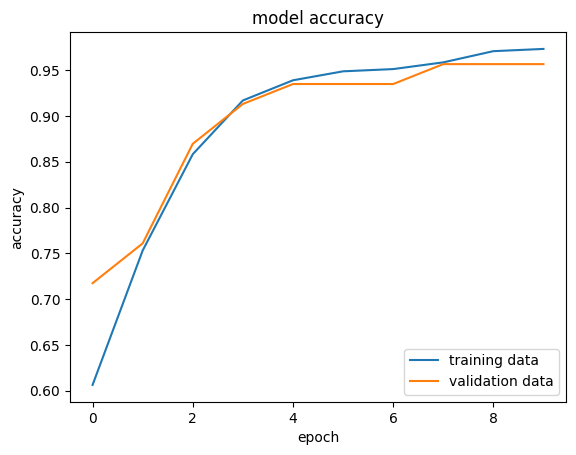

In [22]:
#visualizing the accuracy and the loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc= 'lower right')

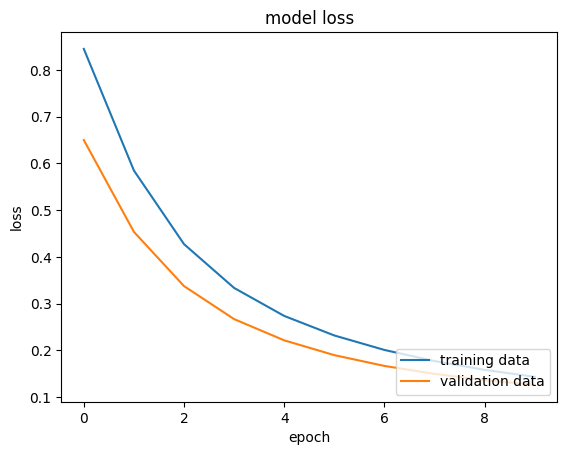

In [23]:
#visualizing the accuracy and the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc= 'lower right')

accuracy of the test data

In [24]:
loss , accuracy = model.evaluate(x_test_std,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9707 - loss: 0.1338 


In [25]:
print(accuracy)

0.9736841917037964


In [27]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[ 0.44199702  0.212229    0.42163229  0.28029849  0.46059068  0.31923771
  0.32738868  0.3980721   0.45467963  0.05268291 -0.22649032 -0.56019683
 -0.32014237 -0.19125366 -0.76043663 -0.08046584 -0.26006979 -0.51214349
 -0.33901861 -0.23280218  0.65164049  0.74215747  0.53471259  0.33156671
  1.02726691  1.30534397  0.62768506  0.50566574  1.76577066  1.29575996]


In [28]:
y_pred = model.predict(x_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [30]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.79995054 0.23429282]


model.predict() gives the prediction probability of each class of that data_point

In [31]:
# converting the prediction probability to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]

In [36]:
k = pd.DataFrame(y_pred_labels)

#building a predictive system

In [39]:
input_data =(842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601)

# change the inpute data to a numpy array

input_data = np.asarray(input_data)

# reshape the numpy array
input_data = input_data.reshape(1,-1)

# standerizing input data
input_data  = scaler.transform(input_data)

prediction = model.predict(input_data)

prediction =  [np.argmax(prediction)]

if(prediction[0]==0):
  print('the tumor is Malignant')
else :
  print(' the tu,or is benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
the tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
